### By : Pushkar Gujarathi
### GRIP : The Spark Foundation #GRIP AUG2021
### Data Science and Business Analytics
### Taks 2 : Prediction Using Unsupervised ML
### Objective : From the given ‘Iris’ dataset, predict the optimum number of cluster and represent it visually.
### Dataset URL :  https://bit.ly/3kXTdox

### Importing The Dataset

In [1]:
# importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn import datasets

In [2]:
# Loading the iris dataset from sklearn 

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
# Display the first 5 rows of the dataset

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Display the dimensions of the dataset

iris_df.shape

(150, 4)

In [5]:
# Display the numerical insights on the dataset

iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Checking for null values in the dataset

iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

### Visualize and Analyze the Dataset

In [7]:
# Finding the corelation between the data

corr_df = iris_df.corr()
corr_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

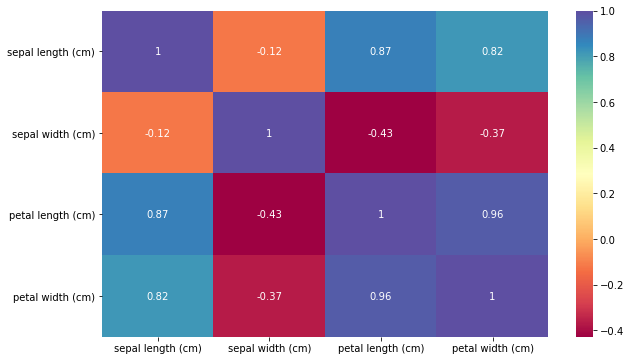

In [8]:
# Plotting a heat map for the dataset

plt.figure(figsize = [10,6])
sns.heatmap(corr_df, cmap = 'Spectral', annot=True)

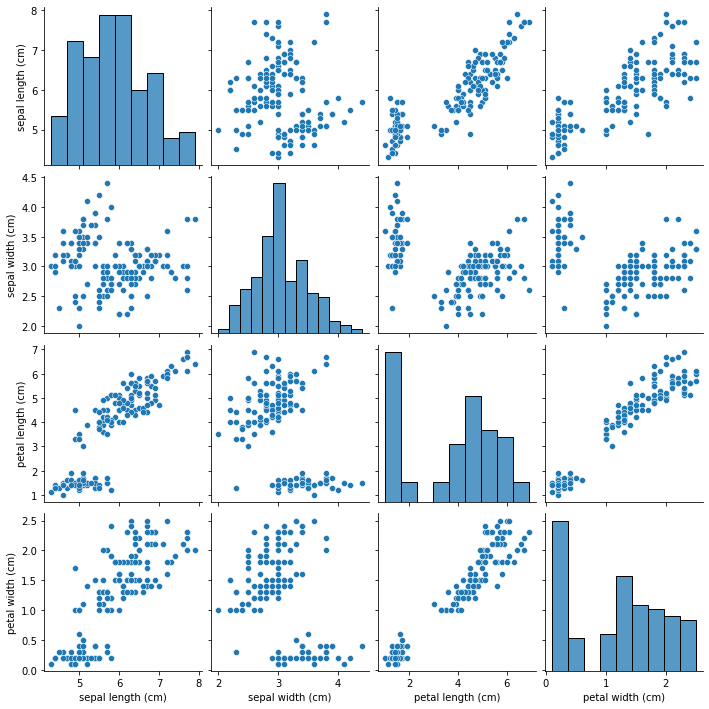

In [9]:
# Plotting a graph by considering different attributes in pairs

sns.pairplot(iris_df)

### Desigen the k-Means Clustering Algorithm for Optimal Clusters

In [10]:
# Extracting the values of different attributes in the dataset such as sepal length, sepal width, petal length and petal width

x = iris_df.iloc[:,[0,1,2,3]].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [11]:
from sklearn.cluster import KMeans

# within cluster sum of squares (WCSS)
wcss = [] 

# K-Means clustering algorithm to find optimal clusters for classification
for  i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

### Plot the K-Means Clustering graph and identify the optimal number of clusters from the graph

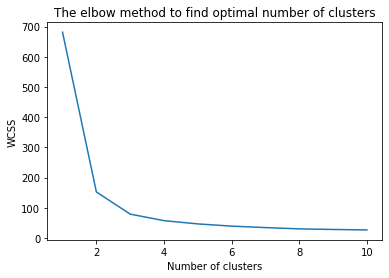

In [12]:
# Plotting the results onto a line graph, allowing us to observe 'The elbow' 

plt.plot(range(1, 11),wcss)
plt.title('The elbow method to find optimal number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Whithin cluster sum of squares
plt.show()

In [13]:
# Applying Kmeans to the dataset / creating the Kmeans classifier with optimal clusters to be 3

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### Visualize the Clusters

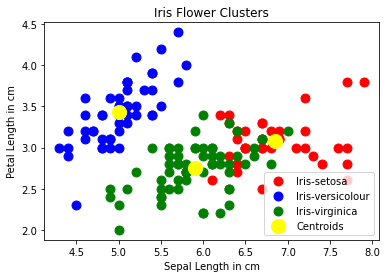

In [14]:
# Visualising the clusters on the first two columns

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 80, c = 'red', label = 'Iris-setosa')

plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 80, c = 'blue', label = 'Iris-versicolour')

plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 80, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_ [:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
plt.legend()
plt.show()
